# Churn Predict 

## Import the librarys

In [1]:
# library and Data Manipulation
import pandas as pd
import numpy as np 

# Charts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import matplotlib.gridspec as gridspec

# Data preparation
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, train
from sklearn.neural_network import MLPClassifier

# Evaluating the models
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

# Serializing the model 
import pickle

# Avoiding unnecessary messages
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
143,144,15713483,Greeves,793,Spain,Male,52,2,0.00,1,1,0,159123.82,1
280,281,15668893,Wilsmore,782,France,Male,39,8,0.00,2,1,1,33949.67,0
3420,3421,15654519,Hassall,680,France,Male,31,1,0.00,2,1,1,3148.20,0
540,541,15667896,De Luca,833,France,Male,37,8,151226.18,2,1,1,136129.49,0
3447,3448,15612092,Palmer,646,Germany,Male,32,8,105397.80,1,1,0,78111.84,1


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Check values of the dataset  

In [9]:
# Verifying the missing data
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Check the duplicated data 
df.duplicated().sum()

0

<h3> Split and Analysis </h3>
After check the dataset as all, it's necessary to split the data according with data type. 

In [11]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
# get only the numerical data
df_num = df.select_dtypes(include='number')

In [13]:
df_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# Verifying the distribuction of the numerical data
df_num.describe(percentiles =[0.01, 0.1, 1,.35, .25, .75, .90, .99])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
1%,432.000000,21.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1842.825300,0.000000
10%,521.000000,27.000000,1.000000,0.000000,1.000000,0.00000,0.000000,20273.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
35%,613.000000,34.000000,3.000000,0.000000,1.000000,1.00000,0.000000,70659.728000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [16]:
df_obj = df.select_dtypes(include='object')

In [17]:
df_obj.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [18]:
df_obj.describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [19]:
print(set(df_obj['Geography']))

{'France', 'Germany', 'Spain'}


<font color = blue><h1> A few comments after proceed </h1> </color>

There is no missing data at the dataset. But there are a few columns which will be very interesting to drop out. 


# First Data Analysis

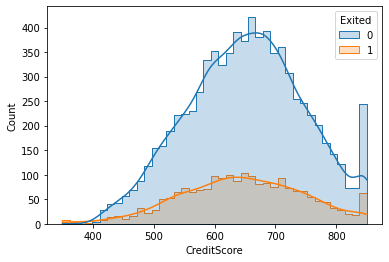

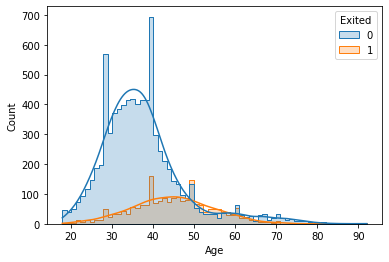

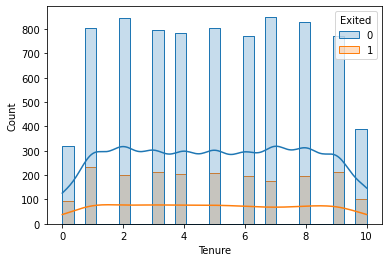

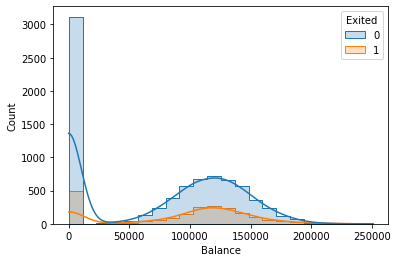

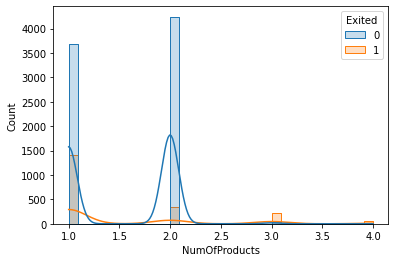

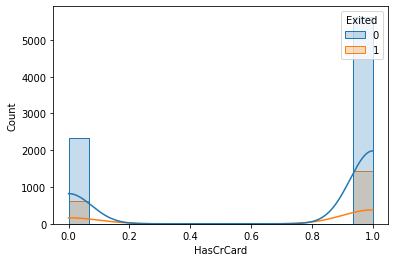

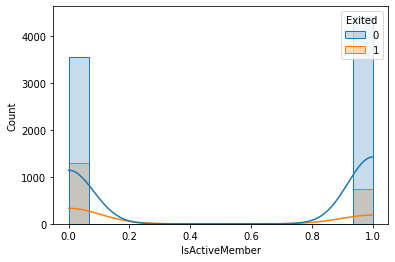

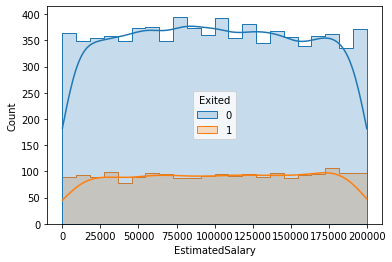

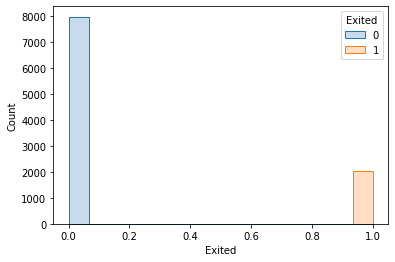

<Figure size 432x288 with 0 Axes>

In [20]:
for i in df_num:
    sns.histplot(x=i,data=df, hue='Exited',kde=True, element="step")  
    plt.figure()

Now check the outliers

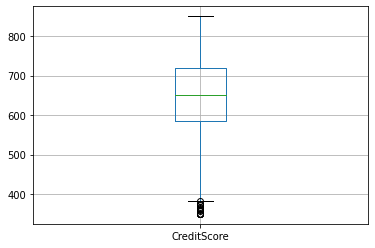

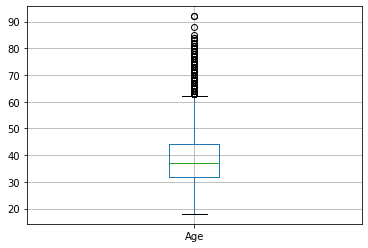

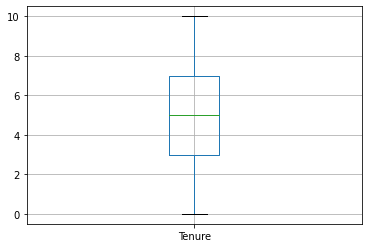

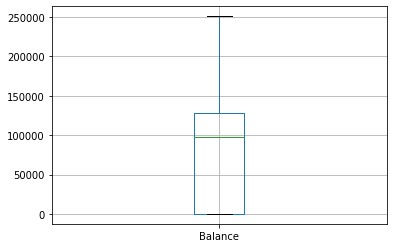

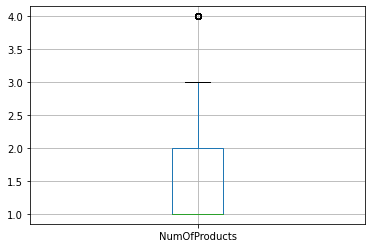

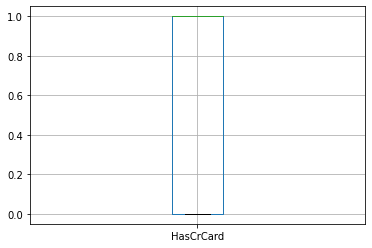

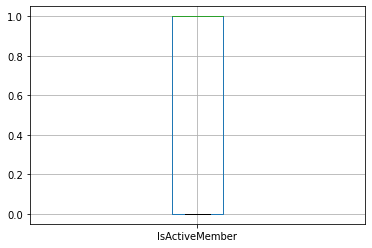

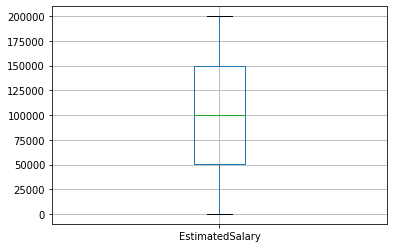

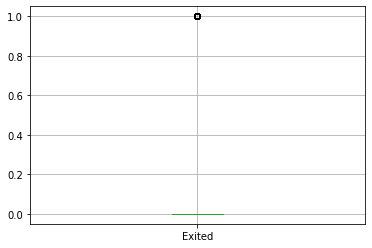

<Figure size 432x288 with 0 Axes>

In [21]:
for i in df_num:
    df[df.columns].boxplot(i)
    plt.figure()

Aparentemente o dataset está completo com todos os campos preenchidos com dados. Então, deve-se se olhar um pouco sobre esse dataset

Na coluna de Balance (Saldo) há alguns valores que constam como zerados, vamos descobrir quantos dados zerados há? 

In [22]:
#Dummie code
df.value_counts(['Balance'])

Balance  
0.00         3617
130170.82       2
105473.74       2
133776.86       1
132187.73       1
             ... 
107135.04       1
107106.33       1
107104.50       1
107073.27       1
250898.09       1
Length: 6382, dtype: int64

In [23]:
#Still dummie code, but with percentage
df['Balance'].value_counts(normalize=True)*100

0.00         36.17
130170.82     0.02
105473.74     0.02
85304.27      0.01
159397.75     0.01
             ...  
81556.89      0.01
112687.69     0.01
108698.96     0.01
238387.56     0.01
130142.79     0.01
Name: Balance, Length: 6382, dtype: float64

De 8.000 dados existentes na coluna de Balance 2918, que de acordo com o Código representa 36,4% do dataset. 

In [24]:
df["Balance"].describe(percentiles=[.01, .1, .25, .5, .75, .9, .999])

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
1%            0.000000
10%           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
90%      149244.792000
99.9%    212314.408940
max      250898.090000
Name: Balance, dtype: float64

### Sugestão de roteiro de análise: 

#### Analisar cada variáveis separadamente: 
- Qual o sexo mais frequente no conjunto de treinamento? 
- Qual a proporção entre as pessoas que saíram e ficaram (Exited 1 e 0)
- Qual a idade mais frequente no conjunto de treinamento? 
- Qual a renda media no conjunto de treimento? 
- Quantos produtos os clientes tem em média? 
- Quantos países diferentes temos clientes?
- ...





In [25]:
# Qual o sexo mais frequente no conjunto?
data_exited = df.value_counts(['Exited'])
data_exited

Exited
0         7963
1         2037
dtype: int64

In [26]:
# plotar gráfico de pizza
fig = px.pie(df, values=data_exited, title="Proportion of Exited and Costumers", names=["Costumers", "Exited"],color_discrete_sequence=["orange",  "blue"]) 
fig.show()

In [27]:
# Qual a proporção entre as pessoas que saíram e ficaram (Exited 1 e 0)
data1 = df['Exited'].value_counts(normalize=True)*100
data1

0    79.63
1    20.37
Name: Exited, dtype: float64

In [28]:
# Qual a idade mais frequente no conjunto de treinamento? = moda
df['Age'].mode()

0    37
dtype: int64

In [29]:
# Qual a renda media no conjunto de treimento?
df['EstimatedSalary'].mean()

100090.2398809998

In [30]:
# Quantos produtos os clientes tem em média?
df['NumOfProducts'].mean()

1.5302

Essa é uma coluna muito interessante para se trabalhar! ['NumOfProdcuts']

In [33]:
fig = px.histogram(df,x=df['NumOfProducts'], 
              title='Number Of Products by Exited rate', color=df['Exited'], color_discrete_sequence=["#F2D096",  "#B2E7E8"])
fig.update_xaxes(title_text='Number Of Products')
fig.update_yaxes(title_text='Quantity of clients')
fig.update_layout(legend_title_text="Exited rate")
fig.show()

In [34]:
print(set(df['Geography']))

{'France', 'Germany', 'Spain'}


In [ ]:
# Quantos países diferentes temos clientes?
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

#### Analisar varíaveis com relação as outras variáveis
- Pessoas mais velhas tem remuneração média maior maior?
- Pessoas mais velhas tem maior tendencia a ter cartão de credito? 
- Existe algum país com remuneração média maior? 
- ...

In [ ]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


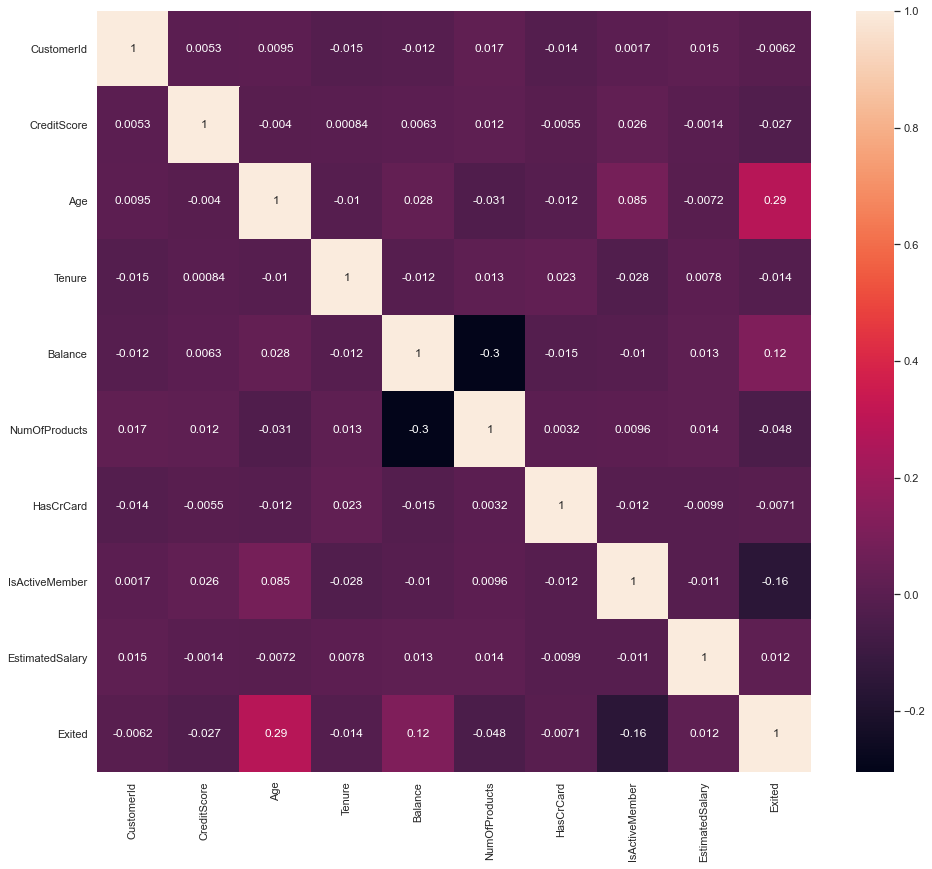

In [ ]:
# plot um gráfico heatmap aqui!
sns.heatmap(df.corr(), annot= True)
sns.set(rc={'figure.figsize':(14,12)})

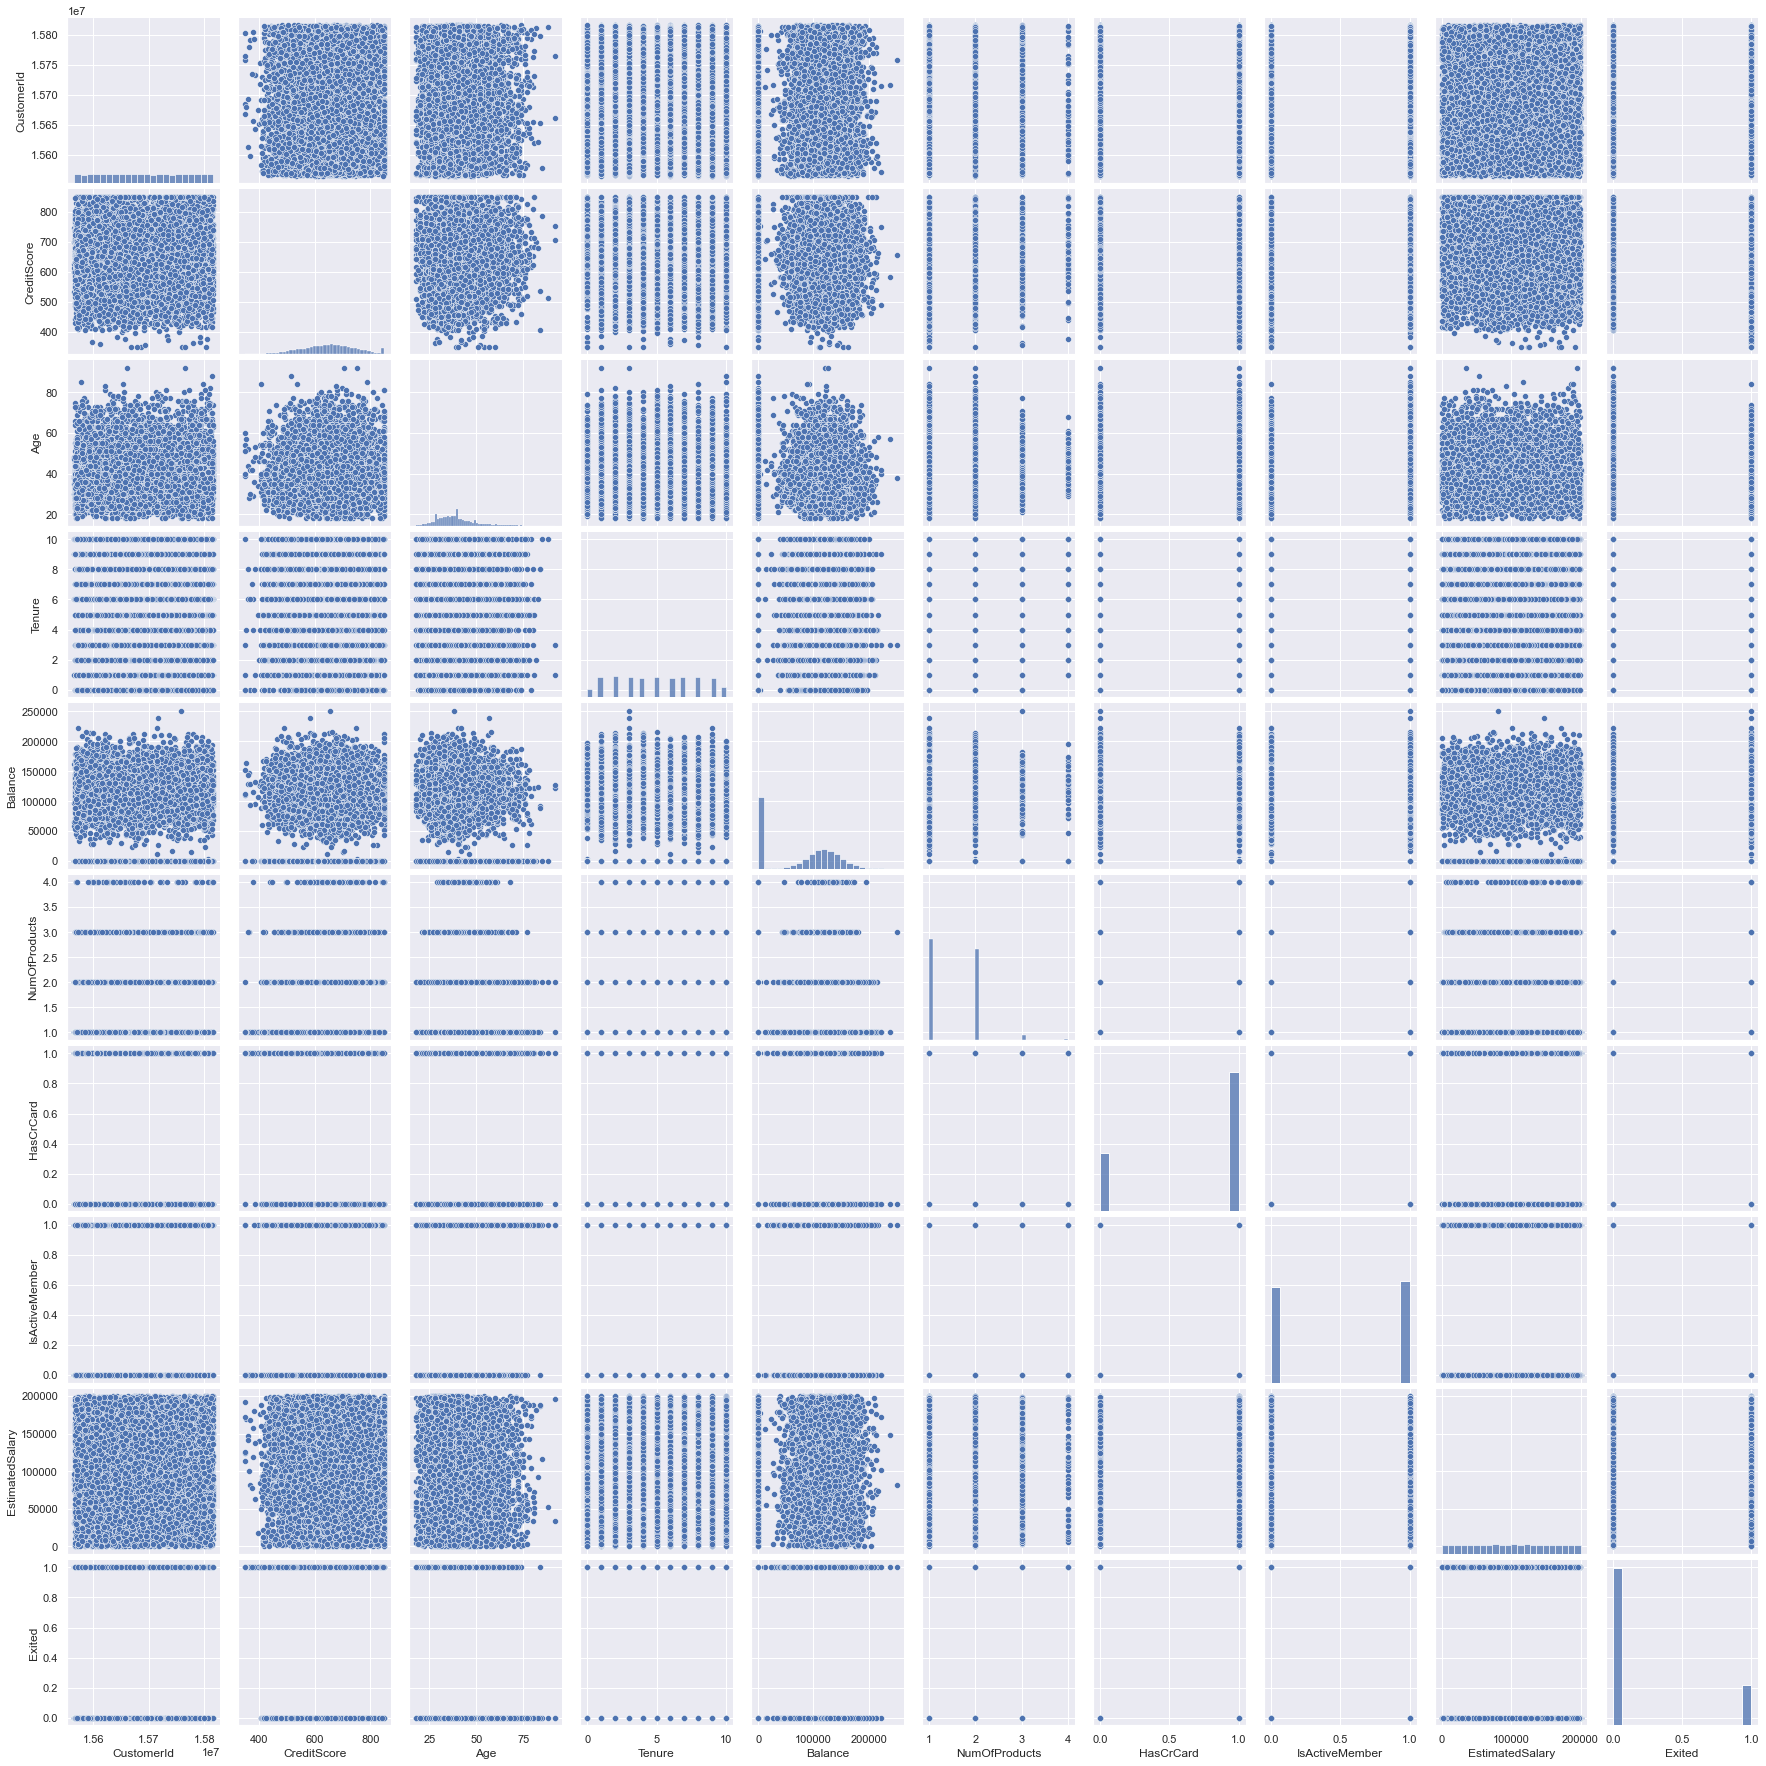

In [ ]:
sns.pairplot(df) 

In [ ]:
df['AgeGroup'] = df['Age'].apply(lambda x: 'Senior' if x >=55  else 'Adult')

In [ ]:
# Pessoas mais velhas tem remuneração média maior maior?  S/N 
# 1. Criar coluna e agrupar os clientes por idadae e depois executar .mean() em cada categoria
df["AgeCategory"] = 'Adult'
df.loc[df['Age'] >= 55, 'AgeCategory'] ='Senior'
df.loc[df['Age'] <= 25, 'AgeCategory'] = 'Young'
display(df)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,AgeCategory
RowNumber,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult,Adult
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult,Adult
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult,Adult
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,Adult
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Adult,Adult
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Adult,Adult
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Adult,Adult


In [ ]:
df.value_counts(['AgeCategory'])

AgeCategory
Adult          8507
Senior          882
Young           611
dtype: int64

In [ ]:
# 2. pessoas mais velhas tendem a ter uma méida maior? 
df.groupby('AgeCategory')['EstimatedSalary'].mean()

AgeCategory
Adult     100410.160699
Senior     95616.542449
Young     102093.897381
Name: EstimatedSalary, dtype: float64

In [ ]:
# Pessoas mais velhas tem maior tendencia a ter cartão de credito? S/N
df.groupby('AgeCategory')['HasCrCard'].mean()*100

AgeCategory
Adult     70.588927
Senior    70.748299
Young     69.721768
Name: HasCrCard, dtype: float64

In [ ]:
# Existe algum país com remuneração média maior? — Group by mean Geography
# df.groupby('A')['B'].mean()
df.groupby('Geography')['EstimatedSalary'].mean()

Geography
France      99899.180814
Germany    101113.435102
Spain       99440.572281
Name: EstimatedSalary, dtype: float64

# Analisar cada variável com relação ao target: 
- Existe alguma faixa etária com maior proporção de clientes que saíram? 
- Existe algum sexo com a maior proporção de clientes que saíram? 
- Existe algum país com a maior proporçào de clientes que saíram? 
- ...
**Use sua criativiade para realizar as análises!**
> *Variavel Target = Exited* <br>


In [ ]:
# Existe alguma faixa etária com maior proporção de clientes que saíram?
df.groupby('AgeCategory')['Exited'].mean()*100

AgeCategory
Adult     19.384037
Senior    38.775510
Young      7.528642
Name: Exited, dtype: float64

In [ ]:
# Existe algum sexo com a maior proporção de clientes que saíram?
df.groupby('Gender')["Exited"].mean()*100

Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64

In [ ]:
# Existe algum país com a maior proporçào de clientes que saíram?
df.groupby('Geography')["Exited"].mean()*100

Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

In [ ]:
# Analisar a coluna Produtcs em relação ao Exited
df.groupby('NumOfProducts')['Exited'].mean()*100

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64

In [ ]:
df["CreditScore"].describe(percentiles=[.001, .01, .1, .25,.35, .5, .75, .9, .999])

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
0.1%       366.998000
1%         432.000000
10%        521.000000
25%        584.000000
35%        613.000000
50%        652.000000
75%        718.000000
90%        778.000000
99.9%      850.000000
max        850.000000
Name: CreditScore, dtype: float64

In [ ]:
df.columns

<h1> Conclusões da Análise Exploratória </h1>

# Transformando Variáveis

## Treinando o Modelo

### Criando o set de treinamento

In [ ]:
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})
df['AgeCategory']= df['AgeCategory'].map({'Adult':0, 'Senior':1, 'Young':2})
#clientes['aprovacao_emprestimo']= clientes['aprovacao_emprestimo'].map({'N':0, 'Y':1})

In [ ]:
df1 = df[['CustomerId', 'Surname',"CreditScore", "Gender",
          "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited", 
          "AgeCategory", "Geography_France", "Geography_Germany", "Geography_Spain"]]
df1.head()

In [ ]:
df = pd.get_dummies(df, columns=['Geography'])

In [ ]:
y = df1['Exited']
X = df1.drop(['CustomerId', 'Surname', 'Exited'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Tratando as variáveis numéricas

In [ ]:
scaler = StandardScaler()

In [ ]:
variaveis_scalling = ['CreditScore', 'EstimatedSalary', 'Balance']

In [ ]:
#Lembrar: uso o metodo fit_transform nos dados de treinamento e transform nos dados de teste/predição! 
X[variaveis_scalling] = scaler.fit_transform(X[variaveis_scalling])

# Tratando as variáveis categoricas

 * Aplicar map e One Hot Coding 

In [ ]:
#Lembrar: uso o metodo fit_transform nos dados de treinamento e transform nos dados de teste/predição! 
X_train[variaveis_categoricas] = label_encoder.fit_transform(X_train[variaveis_categoricas])

### Tratando o desbalanceamento entre as classes

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#Lembrete só aplica over/under sampling nos dados de treinamento
sampling = RandomOverSampler()

In [ ]:
X_train_sampled, y_train_sampled = sampling.fit_resample(X_train, y_train)

### Treinamento do modelo

In [ ]:
model =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

In [ ]:
X_train

In [ ]:
model.fit(X_train, y_train)

### Sugestao de roteiro de modelagem
- Testar varios tipos de modelo: DecisionTree, RandomForest, SVM, XGboost,...
- Testar varios hiperparametros no modelo: GridSearch, RandomSearch,... 
- Aplicar AutoML: Tpot 
- Testar varios formas de categorical encoder: OneHotEncoding, CatboostEncoding, ...
- Testar varios formas de Scalling de features numericas: MinMaxScaler, AbsScaler ...
- Criar novas features a partir das atuais: Dividir idade em faixa etaria, Dividir renda em faixa
- Testar varios conjuntos de features: Excluir features menos importantes, Recursive Feature Elimination

### Links uteis

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- https://www.scikit-yb.org/en/latest/quickstart.html
- https://imbalanced-learn.org/stable/references/over_sampling.html
- https://scikit-learn.org/stable/modules/preprocessing.html
- https://contrib.scikit-learn.org/category_encoders


Provavelmente a alteração do Recall se dá pela não remoção de outliers. É necessário rever o dataset e a análise Exploratória dos dados para tentar aumentar a taxa de Recall.  

## Avaliando o modelo

### Tratando os dados de teste

In [ ]:
y_test = test_df['Exited']
X_test = test_df.drop(['CustomerId', 'Surname', 'Exited'], axis = 1)

In [ ]:
X_test[variaveis_scalling] = scaler.transform(X_test[variaveis_scalling])
X_test[variaveis_categoricas] = label_encoder.transform(X_test[variaveis_categoricas])

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42) 


models = {'KNN':               KNeighborsClassifier(),  
          'Extra Tree':        ExtraTreesClassifier(),  
          'Random Forest':     RandomForestClassifier(),   
          'XGBoost':           XGBClassifier(), 
          'AdaBoost':          AdaBoostClassifier(),  
          'Gradient Boosting': GradientBoostingClassifier(),  
          'Redes Neurais':     MLPClassifier()}  

for reg, modelo in zip(models.values(),models.keys()):
  regressor = reg
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print(modelo)
  print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Precision: {precision_score(y_test, y_pred)*100}%")
  print(f"Recall:    {recall_score(y_test, y_pred)*100}%")
  print(f"F1:        {f1_score(y_test, y_pred)*100}%")
  print('----------------------------------------------------')

### Realizando a predição

In [ ]:
y_pred = model.predict(X_test)

### Calculando as metricas

In [ ]:
confusion_matrix(y_pred= y_pred, y_true = y_test)

In [ ]:
print(classification_report(y_pred= y_pred, y_true = y_test))

In [ ]:
def machine():
    #Modelos
    DTC = DecisionTreeClassifier(criterion="entropy")
    RFC = RandomForestClassifier(n_estimators=200, max_depth=3)
    EXT = ExtraTreesClassifier(n_estimators=100, random_state=0)
    XGB = XGBClassifier()
    ADA = AdaBoostClassifier(n_estimators=100, random_state=0)
    GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
    MLP = MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)

    #X/y and Spliting
    X = df#Pacient 
    X =df.drop('target', axis=1)
    y = df.target  # - TARGET
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    #Train
    DTC.fit(X_train,y_train)
    RFC.fit(X_train,y_train)
    EXT.fit(X_train,y_train)
    XGB.fit(X_train,y_train)
    ADA.fit(X_train,y_train)
    GBC.fit(X_train,y_train)
    MLP.fit(X_train,y_train)
    
    #Preds
    pred_DTC = DTC.predict(X_test)
    pred_RFC = RFC.predict(X_test)
    pred_EXT = EXT.predict(X_test)
    pred_XGB = XGB.predict(X_test)
    pred_ADA = ADA.predict(X_test)
    pred_GBC = GBC.predict(X_test)
    pred_MLP = MLP.predict(X_test)
    
    #Dic
    preds = {'pred_DTC':pred_DTC,
            'pred_RFC':pred_RFC,
            'pred_EXT': pred_EXT,
            'pred_XGB':pred_XGB,
            'pred_ADA': pred_ADA,
            'pred_GBC': pred_GBC,
            'pred_MLP':pred_MLP}
    
   #Accuracy
    acc_DTC = accuracy_score(y_test, pred_DTC)
    acc_RFC = accuracy_score(y_test, pred_RFC)
    acc_EXT = accuracy_score(y_test, pred_EXT)
    acc_XGB = accuracy_score(y_test, pred_XGB)
    acc_ADA = accuracy_score(y_test, pred_ADA)
    acc_GBC = accuracy_score(y_test, pred_GBC)
    acc_MLP = accuracy_score(y_test, pred_MLP)
    
    #Precision Score
    pcr_DTC = precision_score(y_test, pred_DTC)
    pcr_RFC = precision_score(y_test, pred_RFC)
    pcr_EXT = precision_score(y_test, pred_EXT)
    pcr_XGB = precision_score(y_test, pred_XGB)
    pcr_ADA = precision_score(y_test, pred_ADA)
    pcr_GBC = precision_score(y_test, pred_GBC)
    pcr_MLP = precision_score(y_test, pred_MLP)
    
    #Recall
    rcr_DTC = recall_score(y_test, pred_DTC)
    rcr_RFC = recall_score(y_test, pred_RFC)
    rcr_EXT = recall_score(y_test, pred_EXT)
    rcr_XGB = recall_score(y_test, pred_XGB)
    rcr_ADA = recall_score(y_test, pred_ADA)
    rcr_GBC = recall_score(y_test, pred_GBC)
    rcr_MLP = recall_score(y_test, pred_MLP)
    
    #F1 - Score
    fcr_DTC = f1_score(y_test, pred_DTC)
    fcr_RFC = f1_score(y_test, pred_RFC)
    fcr_EXT = f1_score(y_test, pred_EXT)
    fcr_XGB = f1_score(y_test, pred_XGB)
    fcr_ADA = f1_score(y_test, pred_ADA)
    fcr_GBC = f1_score(y_test, pred_GBC)
    fcr_MLP = f1_score(y_test, pred_MLP)

    
    accuracy = {'Decision Tree':acc_DTC*100,'Random Forest':acc_RFC*100,
              'Extra Tree':acc_EXT*100,'XGBoost': acc_XGB*100,'Ada Boost': acc_ADA*100, 
              'Gradient Boost': acc_GBC*100,'Redes Neurais':acc_MLP*100}
    
    precision = {'Decision Tree':pcr_DTC*100, 'Random Forest':pcr_RFC*100,
              'Extra Tree':pcr_EXT*100, 'XGBoost': pcr_XGB*100,'Ada Boost': pcr_ADA*100, 
              'Gradient Boost': pcr_GBC*100,'Redes Neurais':pcr_MLP*100}
    
    recall = {'Decision Tree':rcr_DTC*100,  'Random Forest':rcr_RFC*100,
              'Extra Tree':rcr_EXT*100,'XGBoost': rcr_XGB*100,'Ada Boost': rcr_ADA*100, 
              'Gradient Boost': pcr_GBC*100, 'Redes Neurais':rcr_MLP*100}
        
    f1score= {'Decision Tree':fcr_DTC*100,'Random Forest':fcr_RFC*100,
              'Extra Tree':fcr_EXT*100,'XGBoost': fcr_XGB*100, 'Ada Boost': fcr_ADA*100, 
              'Gradient Boost': fcr_GBC*100,'Redes Neurais':fcr_MLP*100}
    # DataFrame
    data=accuracy,precision, recall, f1score

    df_metrics = pd.DataFrame.from_dict(data=data)

    # Gráfico — Grafico de: 1º Colunas Coluna / 2º Empilhadas 
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.plot(pred_DTC,label='Decsion Tree')
    ax.plot(pred_RFC,label='Random Forest')
    ax.plot(pred_EXT,label='Extra Tree')
    ax.plot(pred_XGB,label='XGBoost')
    ax.plot(pred_ADA,label='ADA')
    ax.plot(pred_GBC,label='GradientBoost', color="red")
    ax.plot(pred_MLP,label='Redes Neurais', color='pink')
    ax.plot(y_test.values,label='alvo',color='black')
    ax.set_title('Desempenho de Modelos de ML')
    ax.set(xlabel='Score', ylabel='Acuracidade')
    legend = ax.legend(loc='best', shadow=True, fontsize='x-large')
    #plt.bar(x = , y= , color='r') 
    # plt.bar(x, y2, bottom=y1, color='b')
    return df_metrics

In [ ]:
machine()

### Explorando a importancia das features na predição

In [ ]:
from yellowbrick.model_selection import FeatureImportances

In [ ]:
viz = FeatureImportances(model, relative=False)

# Fit and show the feature importances
viz.fit(X_test, y_test)
viz.show()

## Exportando o modelo

In [ ]:
modelo = {
'model': model,
'scaler': scaler, 
'variaveis_scalling' : variaveis_scalling,
'encoder': label_encoder, 
'variaveis_categoricas': variaveis_categoricas,
'features_modelo': list(X_train.columns)
}

In [ ]:
modelo

In [ ]:
import joblib

In [ ]:
joblib.dump(modelo, 'modelo.pickle')

In [ ]:
modelo = joblib.load('modelo.pickle')

In [ ]:
def predict(modelo, dataframe):
    dataframe[modelo['variaveis_scalling']] = modelo['scaler'].transform(dataframe[modelo['variaveis_scalling']])
    dataframe[modelo['variaveis_categoricas']] = modelo['encoder'].transform(dataframe[modelo['variaveis_categoricas']])
    dataframe['predicao'] = modelo['model'].predict(dataframe[modelo['features_modelo']])
    return dataframe

In [ ]:
predict(modelo, test_df)

In [ ]:
!pip freeze